In [63]:
import pandas as pd
import glob

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters
from experiments_core import save_excel_results

from nltk.corpus import stopwords

%matplotlib inline

In [64]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])
importlib.reload(sys.modules[save_excel_results.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
files_path = 'data/satirical_real_news_tweets/'
all_files = glob.glob(files_path + "/*.csv")
print("Numero de archivos:", len(all_files))
original_news_df = pd.DataFrame()
files_list = []
for file in all_files:
    df = pd.read_csv(file, index_col=None, header=0, sep='\t')
    files_list.append(df)
original_news_df = pd.concat(files_list, ignore_index=True)
original_news_df = original_news_df.drop(columns=['Unnamed: 0'])
print(original_news_df.describe())
print(original_news_df.head())

Numero de archivos: 16
                                                     text target
count                                               10000  10000
unique                                               9992      2
top     El alcalde de Granada no dimite: «Aquí no hay ...   real
freq                                                    2   5000
                                                text target
0  Las lágrimas de un niño con autismo en un conc...   real
1  Vender carne de mono por ternera https://t.co/...   real
2  #Psicología Si buscas olvido en internet, verá...   real
3  El cantante congoleño Papa Wemba fallece en pl...   real
4  #Lomásvisto Vender carne de mono por ternera h...   real


In [4]:
total_data_content = original_news_df.text
total_data_target = original_news_df.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=70)

In [6]:
print("Reales entrenamiento:", len(y_train[y_train == 'real']))
print("Fakes entrenamiento:", len(y_train[y_train == 'fake']))
print("Reales pruebas:", len(y_test[y_test == 'real']))
print("Fakes pruebas:", len(y_test[y_test == 'fake']))

Reales entrenamiento: 3525
Fakes entrenamiento: 3475
Reales pruebas: 1475
Fakes pruebas: 1525


# Experimentos con el clasificador Regresion Logistica
Los siguientes son los experimentos realizados para el clasificador Regresion Logistica y con los diferentes metodos de ponderación para el modelo de espacio vectorial.

# Linea base

In [7]:
tf_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

binary_vect_baseline = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True)

In [8]:
parameters_logreg = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

## Linea base y parametros optimos para la Regresion Lineal

### TF BaseLine

In [9]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_vect_baseline, parameters_logreg, LogisticRegression())

random state:  10
train time: 2.281s
random state:  20
train time: 2.193s
random state:  30
train time: 2.284s
random state:  40
train time: 2.464s
random state:  50
train time: 2.449s
random state:  60
train time: 2.302s
random state:  70
train time: 2.124s
random state:  80
train time: 2.262s
random state:  90
train time: 2.250s
random state:  100
train time: 2.344s
CPU times: user 11 s, sys: 5.95 s, total: 16.9 s
Wall time: 26.2 s


Numero de caracteristicas:  (7000, 23367)

Best score selected:  0.8875714285714286
Best Accuracy:  0.884
Best Best F1-score:  0.8838810942405022
Best random state:  90
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8875714285714286
C: 1000


Exactitud: 0.884
F1_score: 0.8838810942405022
Precision: 0.8840151759587891
Recall: 0.8837856193894194

             precision    recall  f1-score   support

       fake     0.8844    0.8759    0.8802      1459
       real     0.8836    0.8916    0.8876      1541

avg / total     0.8840    0.8840    0.8840      3000

[[1278  181]
 [ 167 1374]]

Confusion matrix, without normalization
[[1278  181]
 [ 167 1374]]


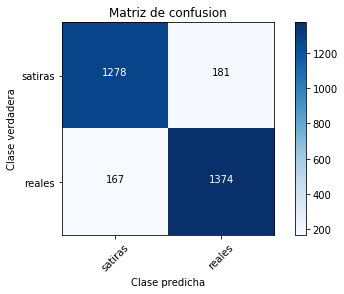

In [10]:
print_baseline_results(tf_baseline_results, parameters_logreg)

### TF-IDF BaseLine

In [11]:
%%time
tf_idf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_logreg, LogisticRegression())

random state:  10
train time: 1.981s
random state:  20
train time: 2.029s
random state:  30
train time: 2.020s
random state:  40
train time: 2.055s
random state:  50
train time: 2.031s
random state:  60
train time: 2.112s
random state:  70
train time: 2.098s
random state:  80
train time: 2.003s
random state:  90
train time: 2.012s
random state:  100
train time: 2.135s
CPU times: user 10.2 s, sys: 6.95 s, total: 17.2 s
Wall time: 24.1 s


Numero de caracteristicas:  (7000, 23369)

Best score selected:  0.8861428571428571
Best Accuracy:  0.8886666666666667
Best Best F1-score:  0.8883950450073156
Best random state:  60
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8861428571428571
C: 1000


Exactitud: 0.8886666666666667
F1_score: 0.8883950450073156
Precision: 0.8912996441804032
Recall: 0.8882621595492883

             precision    recall  f1-score   support

       fake     0.9210    0.8478    0.8829      1485
       real     0.8616    0.9287    0.8939      1515

avg / total     0.8910    0.8887    0.8885      3000

[[1259  226]
 [ 108 1407]]

Confusion matrix, without normalization
[[1259  226]
 [ 108 1407]]


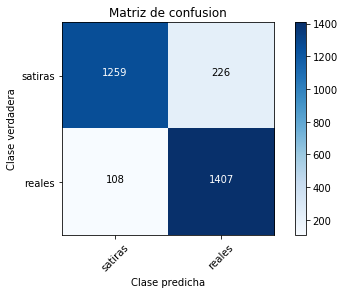

In [12]:
print_baseline_results(tf_idf_baseline_results, parameters_logreg)

### Binary BaseLine

In [16]:
%%time
binary_baseline_results = run_tests_splits(total_data_content, total_data_target, binary_vect_baseline, parameters_logreg, LogisticRegression())

random state:  10
train time: 2.434s
random state:  20
train time: 2.245s
random state:  30
train time: 2.554s
random state:  40
train time: 2.490s
random state:  50
train time: 2.445s
random state:  60
train time: 2.417s
random state:  70
train time: 2.238s
random state:  80
train time: 2.280s
random state:  90
train time: 2.101s
random state:  100
train time: 2.172s
CPU times: user 11.4 s, sys: 6.63 s, total: 18.1 s
Wall time: 26.9 s


Numero de caracteristicas:  (7000, 23290)

Best score selected:  0.8831428571428571
Best Accuracy:  0.8826666666666667
Best Best F1-score:  0.8826658322903629
Best random state:  100
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8831428571428571
C: 1000


Exactitud: 0.8826666666666667
F1_score: 0.8826658322903629
Precision: 0.8826658322903629
Recall: 0.8826658322903629

             precision    recall  f1-score   support

       fake     0.8824    0.8824    0.8824      1496
       real     0.8830    0.8830    0.8830      1504

avg / total     0.8827    0.8827    0.8827      3000

[[1320  176]
 [ 176 1328]]

Confusion matrix, without normalization
[[1320  176]
 [ 176 1328]]


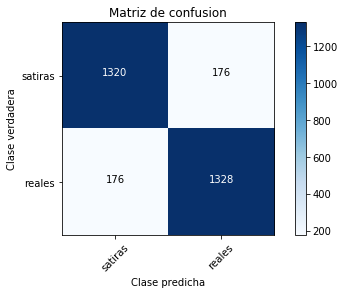

In [17]:
print_baseline_results(binary_baseline_results, parameters_logreg)

In [67]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

### TF BaseLine

Numero de caracteristicas:  (7000, 23367)

train time: 2.618s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8875714285714286
C: 1000

Exactitud: 0.884
F1_score: 0.8838810942405022
Precision: 0.8840151759587891
Recall: 0.8837856193894194

             precision    recall  f1-score   support

       fake     0.8844    0.8759    0.8802      1459
       real     0.8836    0.8916    0.8876      1541

avg / total     0.8840    0.8840    0.8840      3000

[[1278  181]
 [ 167 1374]]

Confusion matrix, without normalization
[[1278  181]
 [ 167 1374]]
CPU times: user 1.26 s, sys: 1.45 s, total: 2.71 s
Wall time: 3.13 s


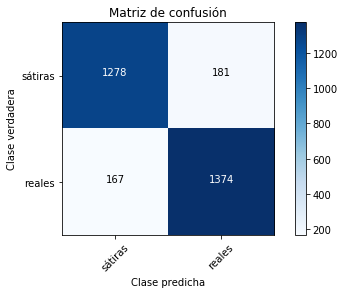

In [68]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_vect_baseline, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_baseline)

### TF-IDF BaseLine

Numero de caracteristicas:  (7000, 23369)

train time: 2.464s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8861428571428571
C: 1000

Exactitud: 0.8886666666666667
F1_score: 0.8883950450073156
Precision: 0.8912996441804032
Recall: 0.8882621595492883

             precision    recall  f1-score   support

       fake     0.9210    0.8478    0.8829      1485
       real     0.8616    0.9287    0.8939      1515

avg / total     0.8910    0.8887    0.8885      3000

[[1259  226]
 [ 108 1407]]

Confusion matrix, without normalization
[[1259  226]
 [ 108 1407]]
CPU times: user 1.14 s, sys: 1.72 s, total: 2.86 s
Wall time: 2.98 s


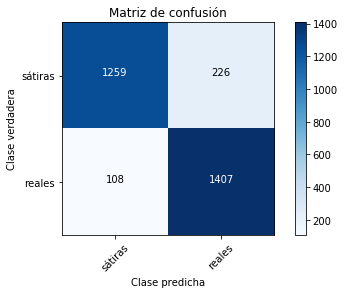

In [69]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_baseline)

### Binary BaseLine

Numero de caracteristicas:  (7000, 23290)

train time: 2.401s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8831428571428571
C: 1000

Exactitud: 0.8826666666666667
F1_score: 0.8826658322903629
Precision: 0.8826658322903629
Recall: 0.8826658322903629

             precision    recall  f1-score   support

       fake     0.8824    0.8824    0.8824      1496
       real     0.8830    0.8830    0.8830      1504

avg / total     0.8827    0.8827    0.8827      3000

[[1320  176]
 [ 176 1328]]

Confusion matrix, without normalization
[[1320  176]
 [ 176 1328]]
CPU times: user 1.11 s, sys: 1.53 s, total: 2.64 s
Wall time: 2.84 s


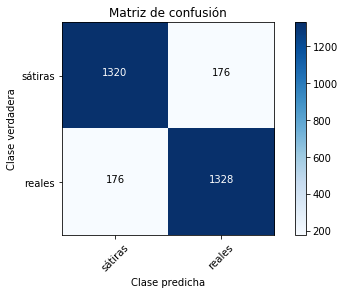

In [70]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_baseline = run_one_experiment(total_data_content, total_data_target, binary_vect_baseline, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_baseline)

## Experimento 1: Remocion de stop words

In [71]:
spanish_stopwords = stopwords.words('spanish')

In [72]:
tf_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                    analyzer = 'word',
                                    tokenizer = default_tokenize,
                                    lowercase = True)
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)
binary_vect_stopwords = CountVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True,
                                        binary=True)

### TF stop words

Numero de caracteristicas:  (7000, 23179)

train time: 1.940s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8812857142857143
C: 1000

Exactitud: 0.884
F1_score: 0.8839504339408965
Precision: 0.8838839079126175
Recall: 0.8840956287786563

             precision    recall  f1-score   support

       fake     0.8756    0.8876    0.8816      1459
       real     0.8922    0.8806    0.8863      1541

avg / total     0.8841    0.8840    0.8840      3000

[[1295  164]
 [ 184 1357]]

Confusion matrix, without normalization
[[1295  164]
 [ 184 1357]]
CPU times: user 1 s, sys: 1.24 s, total: 2.24 s
Wall time: 2.36 s


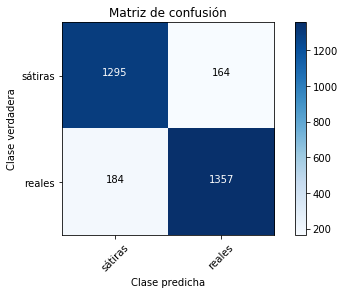

In [73]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_vect_stopwords, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_stopwords)

### TF-IDF stop words

Numero de caracteristicas:  (7000, 23179)

train time: 2.161s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8772857142857143
C: 1000

Exactitud: 0.882
F1_score: 0.8816463065623669
Precision: 0.8853051823795594
Recall: 0.8815414874820815

             precision    recall  f1-score   support

       fake     0.9186    0.8357    0.8752      1485
       real     0.8520    0.9274    0.8881      1515

avg / total     0.8850    0.8820    0.8817      3000

[[1241  244]
 [ 110 1405]]

Confusion matrix, without normalization
[[1241  244]
 [ 110 1405]]
CPU times: user 992 ms, sys: 1.41 s, total: 2.4 s
Wall time: 2.6 s


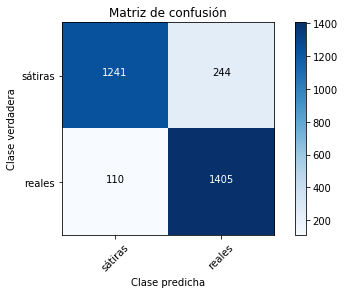

In [74]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

### Binary stop words

Numero de caracteristicas:  (7000, 23100)

train time: 1.942s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8785714285714286
C: 1000

Exactitud: 0.8753333333333333
F1_score: 0.8753324468085106
Precision: 0.8753324468085106
Recall: 0.8753324468085106

             precision    recall  f1-score   support

       fake     0.8750    0.8750    0.8750      1496
       real     0.8757    0.8757    0.8757      1504

avg / total     0.8753    0.8753    0.8753      3000

[[1309  187]
 [ 187 1317]]

Confusion matrix, without normalization
[[1309  187]
 [ 187 1317]]
CPU times: user 1.05 s, sys: 1.32 s, total: 2.37 s
Wall time: 2.42 s


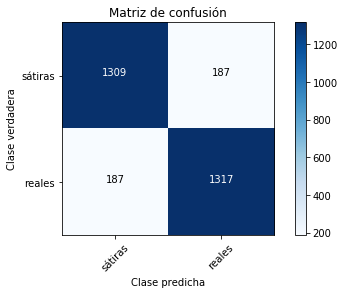

In [75]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_stopwords = run_one_experiment(total_data_content, total_data_target, binary_vect_stopwords, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_stopwords)

## Experimento 2: Stemming

In [76]:
#Prueba de tokenize_stems
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [77]:
tf_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

binary_vect_stemming = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True,
                binary=True)

### TF stemming

Numero de caracteristicas:  (7000, 17699)

train time: 2.388s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8735714285714286
C: 1000

Exactitud: 0.882
F1_score: 0.8818790441412006
Precision: 0.8820124834499716
Recall: 0.8817841240500124

             precision    recall  f1-score   support

       fake     0.8824    0.8739    0.8781      1459
       real     0.8817    0.8897    0.8857      1541

avg / total     0.8820    0.8820    0.8820      3000

[[1275  184]
 [ 170 1371]]

Confusion matrix, without normalization
[[1275  184]
 [ 170 1371]]
CPU times: user 5.34 s, sys: 1.3 s, total: 6.64 s
Wall time: 6.99 s


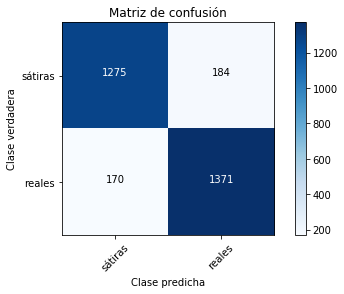

In [78]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_vect_stemming, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_stemming)

### TF-IDF stemming

Numero de caracteristicas:  (7000, 17645)

train time: 2.373s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8791428571428571
C: 1000

Exactitud: 0.8776666666666667
F1_score: 0.8774034791801377
Precision: 0.8798491379310345
Recall: 0.8772910624395773

             precision    recall  f1-score   support

       fake     0.9062    0.8397    0.8717      1485
       real     0.8534    0.9149    0.8831      1515

avg / total     0.8796    0.8777    0.8775      3000

[[1247  238]
 [ 129 1386]]

Confusion matrix, without normalization
[[1247  238]
 [ 129 1386]]
CPU times: user 5.32 s, sys: 1.62 s, total: 6.93 s
Wall time: 7.1 s


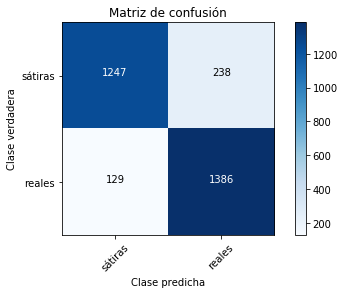

In [79]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_stemming)

### Binary stemming

Numero de caracteristicas:  (7000, 17609)

train time: 2.852s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8724285714285714
C: 1000

Exactitud: 0.8666666666666667
F1_score: 0.866659495910669
Precision: 0.8667999807942297
Recall: 0.8666923853680737

             precision    recall  f1-score   support

       fake     0.8591    0.8763    0.8676      1496
       real     0.8745    0.8570    0.8657      1504

avg / total     0.8668    0.8667    0.8667      3000

[[1311  185]
 [ 215 1289]]

Confusion matrix, without normalization
[[1311  185]
 [ 215 1289]]
CPU times: user 5.99 s, sys: 1.73 s, total: 7.72 s
Wall time: 7.99 s


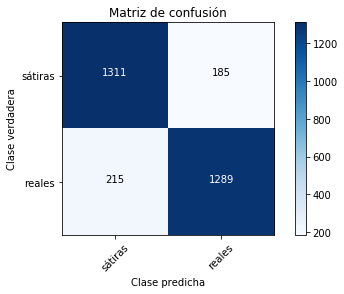

In [80]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_stemming = run_one_experiment(total_data_content, total_data_target, binary_vect_stemming, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_stemming)

## Experimento 3: Lematizacion

In [81]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [82]:
tf_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

binary_vect_lemmatize = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True,
                binary=True)

### TF lemmatize

Numero de caracteristicas:  (7000, 18693)

train time: 2.803s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8762857142857143
C: 1000

Exactitud: 0.8743333333333333
F1_score: 0.8742018183231781
Precision: 0.8743448646647061
Recall: 0.8741026073257399

             precision    recall  f1-score   support

       fake     0.8747    0.8657    0.8701      1459
       real     0.8740    0.8825    0.8783      1541

avg / total     0.8743    0.8743    0.8743      3000

[[1263  196]
 [ 181 1360]]

Confusion matrix, without normalization
[[1263  196]
 [ 181 1360]]
CPU times: user 1.42 s, sys: 1.74 s, total: 3.16 s
Wall time: 3.46 s


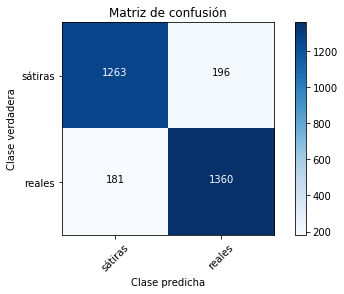

In [83]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_vect_lemmatize, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_lemmatize)

### TF-IDF lemmatize

Numero de caracteristicas:  (7000, 18669)

train time: 2.456s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8774285714285714
C: 1000

Exactitud: 0.879
F1_score: 0.8786676977869723
Precision: 0.8819496142317192
Recall: 0.8785645231189785

             precision    recall  f1-score   support

       fake     0.9131    0.8350    0.8723      1485
       real     0.8508    0.9221    0.8850      1515

avg / total     0.8816    0.8790    0.8787      3000

[[1240  245]
 [ 118 1397]]

Confusion matrix, without normalization
[[1240  245]
 [ 118 1397]]
CPU times: user 1.26 s, sys: 1.54 s, total: 2.8 s
Wall time: 2.98 s


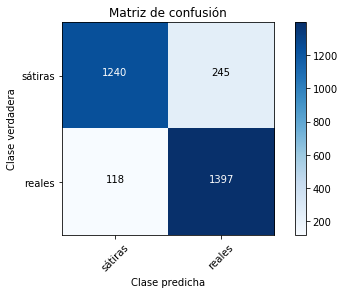

In [84]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

### Binary lemmatize

Numero de caracteristicas:  (7000, 18627)

train time: 2.479s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8718571428571429
C: 1000

Exactitud: 0.8686666666666667
F1_score: 0.8686652073911931
Precision: 0.8687112299560318
Recall: 0.868681732847878

             precision    recall  f1-score   support

       fake     0.8639    0.8743    0.8691      1496
       real     0.8735    0.8630    0.8682      1504

avg / total     0.8687    0.8687    0.8687      3000

[[1308  188]
 [ 206 1298]]

Confusion matrix, without normalization
[[1308  188]
 [ 206 1298]]
CPU times: user 1.41 s, sys: 1.42 s, total: 2.82 s
Wall time: 3.11 s


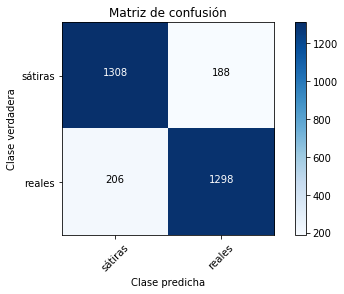

In [85]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, binary_vect_lemmatize, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [86]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [87]:
tf_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

binary_vect_no_urls = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True,
                binary=True)

### TF sin URLs

Numero de caracteristicas:  (7000, 15609)

train time: 2.549s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8474285714285714
C: 1000

Exactitud: 0.839
F1_score: 0.8389869579435933
Precision: 0.8391570999073696
Recall: 0.8393811109544509

             precision    recall  f1-score   support

       fake     0.8223    0.8533    0.8375      1459
       real     0.8560    0.8254    0.8404      1541

avg / total     0.8396    0.8390    0.8390      3000

[[1245  214]
 [ 269 1272]]

Confusion matrix, without normalization
[[1245  214]
 [ 269 1272]]
CPU times: user 1.37 s, sys: 1.22 s, total: 2.58 s
Wall time: 2.98 s


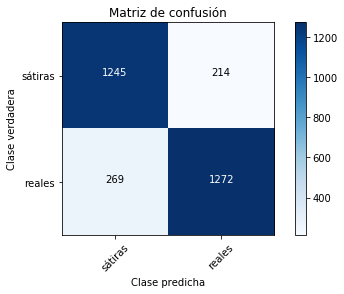

In [88]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_vect_no_urls, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_no_urls)

### TF-IDF sin URLs

Numero de caracteristicas:  (7000, 15636)

train time: 2.629s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8448571428571429
C: 1000

Exactitud: 0.855
F1_score: 0.8549276411312264
Precision: 0.8552536025516888
Recall: 0.8548621528819549

             precision    recall  f1-score   support

       fake     0.8626    0.8411    0.8517      1485
       real     0.8479    0.8686    0.8582      1515

avg / total     0.8552    0.8550    0.8550      3000

[[1249  236]
 [ 199 1316]]

Confusion matrix, without normalization
[[1249  236]
 [ 199 1316]]
CPU times: user 1.28 s, sys: 1.82 s, total: 3.1 s
Wall time: 3.17 s


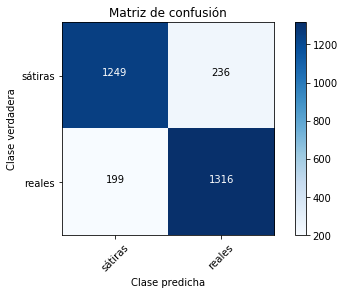

In [89]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

### Binary sin URLs

Numero de caracteristicas:  (7000, 15538)

train time: 3.160s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.845
C: 1000

Exactitud: 0.8446666666666667
F1_score: 0.8445720974228319
Precision: 0.8456706935553737
Recall: 0.8447384514734327

             precision    recall  f1-score   support

       fake     0.8264    0.8717    0.8484      1496
       real     0.8650    0.8178    0.8407      1504

avg / total     0.8457    0.8447    0.8446      3000

[[1304  192]
 [ 274 1230]]

Confusion matrix, without normalization
[[1304  192]
 [ 274 1230]]
CPU times: user 1.46 s, sys: 2.02 s, total: 3.48 s
Wall time: 3.66 s


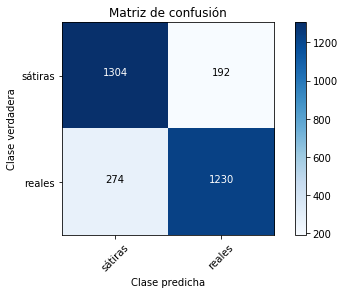

In [90]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_no_urls = run_one_experiment(total_data_content, total_data_target, binary_vect_no_urls, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [91]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [92]:
tf_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

binary_vect_norm_letters = CountVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True,
                binary=True)

### TF sin letras repetidas

Numero de caracteristicas:  (7000, 23288)

train time: 2.844s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.887
C: 1000

Exactitud: 0.884
F1_score: 0.8838860018569342
Precision: 0.8839965094199825
Recall: 0.8838038552358451

             precision    recall  f1-score   support

       fake     0.8839    0.8766    0.8802      1459
       real     0.8841    0.8910    0.8875      1541

avg / total     0.8840    0.8840    0.8840      3000

[[1279  180]
 [ 168 1373]]

Confusion matrix, without normalization
[[1279  180]
 [ 168 1373]]
CPU times: user 2.51 s, sys: 1.78 s, total: 4.3 s
Wall time: 4.69 s


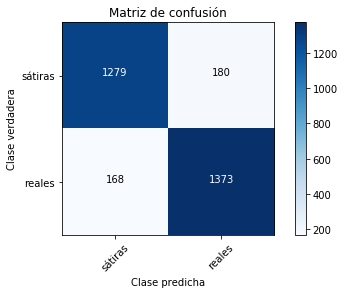

In [93]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_vect_norm_letters, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_norm_letters)

### TF-IDF sin letras repetidas

Numero de caracteristicas:  (7000, 23296)

train time: 2.535s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8855714285714286
C: 1000

Exactitud: 0.8883333333333333
F1_score: 0.8880645763812247
Precision: 0.8909206226350189
Recall: 0.8879321265459879

             precision    recall  f1-score   support

       fake     0.9203    0.8478    0.8826      1485
       real     0.8615    0.9281    0.8935      1515

avg / total     0.8906    0.8883    0.8881      3000

[[1259  226]
 [ 109 1406]]

Confusion matrix, without normalization
[[1259  226]
 [ 109 1406]]
CPU times: user 2.47 s, sys: 1.71 s, total: 4.18 s
Wall time: 4.39 s


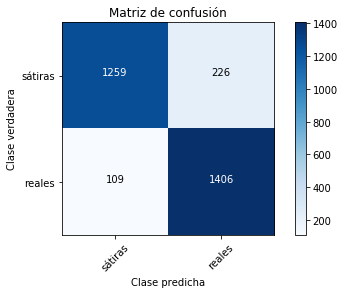

In [94]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

### Binary sin letras repetidas

Numero de caracteristicas:  (7000, 23208)

train time: 2.782s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.882
C: 1000

Exactitud: 0.882
F1_score: 0.8819986888743209
Precision: 0.8820007786791255
Recall: 0.881997383092502

             precision    recall  f1-score   support

       fake     0.8822    0.8810    0.8816      1496
       real     0.8818    0.8830    0.8824      1504

avg / total     0.8820    0.8820    0.8820      3000

[[1318  178]
 [ 176 1328]]

Confusion matrix, without normalization
[[1318  178]
 [ 176 1328]]
CPU times: user 2.71 s, sys: 1.74 s, total: 4.45 s
Wall time: 4.76 s


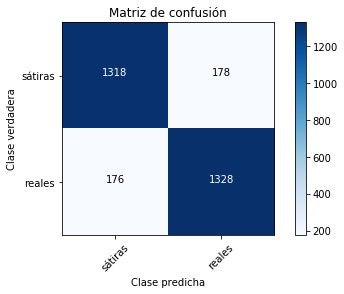

In [95]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, binary_vect_norm_letters, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [96]:
tf_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

binary_vect_pruning10 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=10)

### TF pruning < 10

Numero de caracteristicas:  (7000, 1218)

train time: 2.654s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8254285714285714
C: 1000

Exactitud: 0.8273333333333334
F1_score: 0.8272547150347536
Precision: 0.8272007062993922
Recall: 0.8273683583157017

             precision    recall  f1-score   support

       fake     0.8186    0.8286    0.8236      1459
       real     0.8359    0.8261    0.8309      1541

avg / total     0.8274    0.8273    0.8274      3000

[[1209  250]
 [ 268 1273]]

Confusion matrix, without normalization
[[1209  250]
 [ 268 1273]]
CPU times: user 1.22 s, sys: 1.42 s, total: 2.64 s
Wall time: 3.06 s


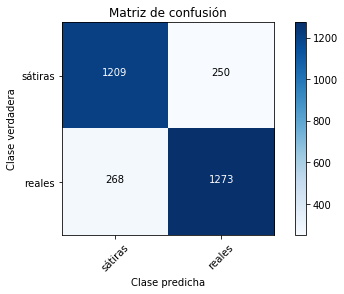

In [97]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning10, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_pruning10)

### TF-IDF pruning < 10

Numero de caracteristicas:  (7000, 1226)

train time: 2.321s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8285714285714286
C: 1000

Exactitud: 0.8126666666666666
F1_score: 0.812661337922501
Precision: 0.8126634722948766
Recall: 0.8126946027936127

             precision    recall  f1-score   support

       fake     0.8079    0.8155    0.8117      1485
       real     0.8175    0.8099    0.8137      1515

avg / total     0.8127    0.8127    0.8127      3000

[[1211  274]
 [ 288 1227]]

Confusion matrix, without normalization
[[1211  274]
 [ 288 1227]]
CPU times: user 1.12 s, sys: 1.42 s, total: 2.54 s
Wall time: 2.77 s


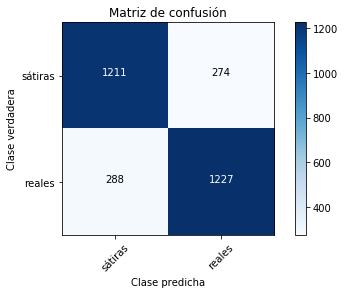

In [98]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

### Binary pruning < 10

Numero de caracteristicas:  (7000, 1215)

train time: 2.931s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8227142857142857
C: 1000

Exactitud: 0.8216666666666667
F1_score: 0.8216650616522214
Precision: 0.8216657962866254
Recall: 0.8216645096142905

             precision    recall  f1-score   support

       fake     0.8214    0.8209    0.8211      1496
       real     0.8219    0.8225    0.8222      1504

avg / total     0.8217    0.8217    0.8217      3000

[[1228  268]
 [ 267 1237]]

Confusion matrix, without normalization
[[1228  268]
 [ 267 1237]]
CPU times: user 1.32 s, sys: 1.7 s, total: 3.02 s
Wall time: 3.43 s


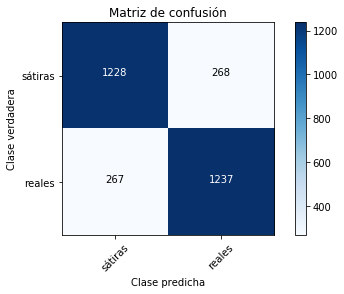

In [99]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning10, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [100]:
tf_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

binary_vect_pruning5 = CountVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                binary=True,
                min_df=5)

### TF pruning < 5

Numero de caracteristicas:  (7000, 2643)

train time: 2.565s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8294285714285714
C: 1000

Exactitud: 0.829
F1_score: 0.8289338354090064
Precision: 0.8288833592037252
Recall: 0.829081860714605

             precision    recall  f1-score   support

       fake     0.8192    0.8321    0.8256      1459
       real     0.8386    0.8261    0.8323      1541

avg / total     0.8291    0.8290    0.8290      3000

[[1214  245]
 [ 268 1273]]

Confusion matrix, without normalization
[[1214  245]
 [ 268 1273]]
CPU times: user 1.11 s, sys: 1.5 s, total: 2.61 s
Wall time: 2.97 s


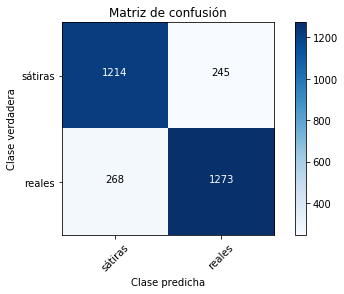

In [101]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_vect_pruning5, optimal_parameters, LogisticRegression(), 90)
all_experiments_results.append(clf_tf_vect_pruning5)

### TF-IDF pruning < 5

Numero de caracteristicas:  (7000, 2611)

train time: 2.404s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8314285714285714
C: 1000

Exactitud: 0.8193333333333334
F1_score: 0.8193236169589565
Precision: 0.8196511566370828
Recall: 0.8194886155282195

             precision    recall  f1-score   support

       fake     0.8068    0.8350    0.8206      1485
       real     0.8325    0.8040    0.8180      1515

avg / total     0.8198    0.8193    0.8193      3000

[[1240  245]
 [ 297 1218]]

Confusion matrix, without normalization
[[1240  245]
 [ 297 1218]]
CPU times: user 1.03 s, sys: 1.67 s, total: 2.7 s
Wall time: 2.82 s


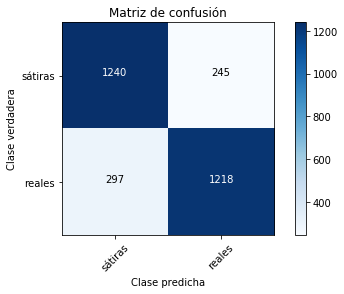

In [102]:
%%time
optimal_parameters = {'C': [1000]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, LogisticRegression(), 60)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

### Binary pruning < 5

Numero de caracteristicas:  (7000, 2623)

train time: 2.679s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8215714285714286
C: 1000

Exactitud: 0.8073333333333333
F1_score: 0.8073278528811486
Precision: 0.807405761024182
Recall: 0.8073532967345545

             precision    recall  f1-score   support

       fake     0.8020    0.8148    0.8084      1496
       real     0.8128    0.7999    0.8063      1504

avg / total     0.8074    0.8073    0.8073      3000

[[1219  277]
 [ 301 1203]]

Confusion matrix, without normalization
[[1219  277]
 [ 301 1203]]
CPU times: user 1.3 s, sys: 1.78 s, total: 3.08 s
Wall time: 3.2 s


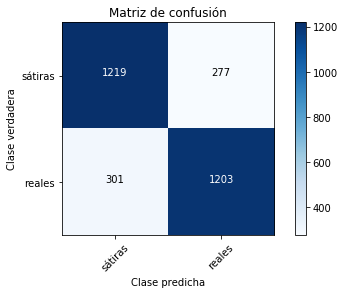

In [103]:
%%time
optimal_parameters = {'C': [1000]}
clf_binary_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, binary_vect_pruning5, optimal_parameters, LogisticRegression(), 100)
all_experiments_results.append(clf_binary_vect_pruning5)

In [104]:
len(all_experiments_results)

24

In [105]:
#save_excel_results('result_es_news_fakes_logreg.xlsx', all_experiments_results)